In [32]:
# na początku importuje niezbędne moduły
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

plt.style.use('seaborn') #zmieniam styl wykresów na seaborn, ponieważ podoba mi się ten styl i to tylko kwestia moich preferencji

In [33]:
dane = pd.read_csv("vgsales.csv") #wczytuję plik z danymi do zmiennej 'dane'
dane #wyświetlam dane, żeby wstępnie zobaczyć co się znajduje w zbiorze

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [34]:
#przytępuję do czyszczenia zbioru:
dane = dane.dropna() #usuwam braki danych 'NaN'
dane = dane.drop_duplicates() #usuwam wiersze, które są swoimi duplikatami, jeśli jakieś występują
dane.drop(columns = 'Rank', inplace = True) #usuwam kolumnę "Rank", ponieważ stanowi jedynie kopię indeksowania wierszów, jest efektem sortowania zbioru pod względem sprzedaży globalnej 
                                            #i raczej nie będziemy jej używać
dane #ponownie wyświetlam dane, żeby zobaczyć jak po czyszczeniu wygląda zbiór, tzn. ile danych zostało

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Jak widać powyżej, po wyczyszczeniu zbiór dalej posiada on bardzo dużo danych i wygląda obiecująco zatem przystępuję to analizy zbioru

In [35]:
dane.info() #sprawdzam podstawowe informacje na temat zmiennych, najbardziej interesuje mnie typ każdej zmiennej

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16289 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16289 non-null  object 
 1   Platform      16289 non-null  object 
 2   Year          16289 non-null  object 
 3   Genre         16289 non-null  object 
 4   Publisher     16289 non-null  object 
 5   NA_Sales      16289 non-null  float64
 6   EU_Sales      16289 non-null  float64
 7   JP_Sales      16289 non-null  float64
 8   Other_Sales   16289 non-null  float64
 9   Global_Sales  16289 non-null  float64
dtypes: float64(5), object(5)
memory usage: 1.4+ MB


In [36]:
#poniżej zamieniam typy zmiennych automatycznie wczytane jako object na odpowiednie typy, tzn. rok zamieniam na int64 a zmienne kategorialne na typ category
dane['Year'] = dane['Year'].astype(np.int64)
dane['Platform'] = dane['Platform'].astype('category')
dane['Genre'] = dane['Genre'].astype('category')
dane['Publisher'] = dane['Publisher'].astype('category')
dane.info() #ponownie wyświetlam informacje o zmiennych, żeby sprawdzić, czy zmiana typów przebiegła pomyślnie

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16289 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Name          16289 non-null  object  
 1   Platform      16289 non-null  category
 2   Year          16289 non-null  int64   
 3   Genre         16289 non-null  category
 4   Publisher     16289 non-null  category
 5   NA_Sales      16289 non-null  float64 
 6   EU_Sales      16289 non-null  float64 
 7   JP_Sales      16289 non-null  float64 
 8   Other_Sales   16289 non-null  float64 
 9   Global_Sales  16289 non-null  float64 
dtypes: category(3), float64(5), int64(1), object(1)
memory usage: 1.1+ MB


Wydaje mi się, że zbiór jest gotowy do analizy statycznej i zaczynam od opisu statystycznego zmiennych:

In [37]:
dane.mode() #wyznaczam dominante każdej zmiennej

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Need for Speed: Most Wanted,DS,2009,Action,Electronic Arts,0.0,0.0,0.0,0.0,0.02


In [38]:
for zmienna in ['Publisher','Genre','Platform']:
    print(zmienna,':',len(dane[zmienna].unique())) #wyzmaczam liczbę kategorii dla wszystkich zmiennych kategorialnych

Publisher : 576
Genre : 12
Platform : 31


In [39]:
dane.describe() #wyznaczam podstawowe statystyki dla zmiennych ilościowych

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16289.000000,16289.000000,16289.000000,16289.000000,16289.000000,16289.000000
mean,2006.405304,0.264763,0.147035,0.078862,0.048432,0.540969
std,5.832700,0.822388,0.509101,0.311901,0.190094,1.567432
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Z kwartyli widać, że odchylenie ćwartkowe wynosi kolejno: 3.5 roku, 0.12 mln, 0.055 mln, 0.02 mln, 0.02 mln, 0.21 mln

In [40]:
dane.skew() #wyznaczam skośność dla wszystkich zmiennych ilościowych

Year            -1.003365
NA_Sales        18.749008
EU_Sales        18.802380
JP_Sales        11.122988
Other_Sales     24.101327
Global_Sales    17.303441
dtype: float64

In [41]:
n = len(dane.Year)
se_skew = ((6*n*(n-1))/((n-2)*(n+1)*(n+3)))**0.5 #obliczam standardowy błąd skosności; ponieważ wszystkie zmienne mają taką samą liczbność to, dla każdej obowiązuje ten sam błąd
se_skew

0.019190594380336108

In [42]:
dane.kurtosis() #wyznaczam kurtozę dla wszystkich zmiennych ilościowych

Year               1.844839
NA_Sales         643.206999
EU_Sales         747.817232
JP_Sales         191.175164
Other_Sales     1011.863537
Global_Sales     595.942336
dtype: float64

In [43]:
se_kurt = 2*se_skew*(((n**2-1)/((n-3)*n-5))**0.5) #obliczam standardowy błąd kurtozy; ponieważ wszystkie zmienne mają taką samą liczbność, to dla każdej obowiązuje ten sam błąd
se_kurt

0.038384723934765254

Wszystkie informacje potrzebne do opisu zmiennych zostały policzone zatem przystępuję do analiz i wizualizacji

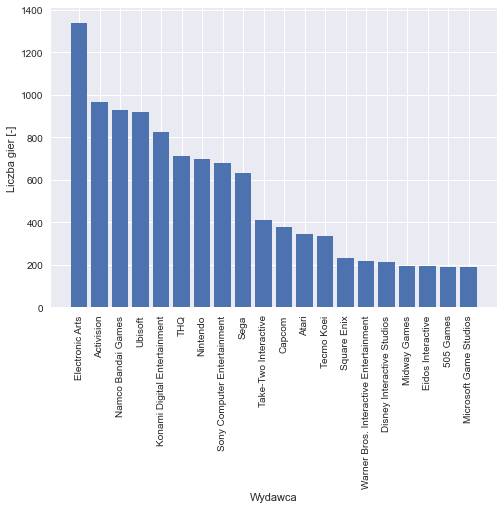

In [44]:
#wizualizacja rozkładu zmiennej 'Publisher'
pub = dane.Publisher.value_counts() #pod zmienną 'pub' zapisuję liczbę wystąpień każdego wydawcy, co oznacza liczbę wydanych przez nich gier
pub = dict(pub) #zamieniam 'pub' na słownik, żeby mieć dostęp do indeksów
plt.bar(list(pub.keys())[:20],list(pub.values())[:20]) #pokazuję tylko 20 pierwszych wydawców dla lepszej czytelności wykresu, ponieważ wszystkich wydawców jest 576 i wykres ze wszystkimi byłby bardzo                                                                    #niepraktyczny, żeby to zrobić dodatkowo zamieniam keys i values na listy, żebym mógł użyć slicingu

plt.xlabel('Wydawca') #na osi x umieściłem nazwy wydawców
plt.ylabel('Liczba gier [-]') #na osi y umieściłem liczbę wystąpień każdego w danych, czyli liczbę gier jakie wydał
plt.xticks(rotation=90) #ustawiam obrót etykiet na osi x, ponieważ są długie i bez niego nachodzą na siebie nawzajem, co czyni wykres nieczytelnym
plt.show()

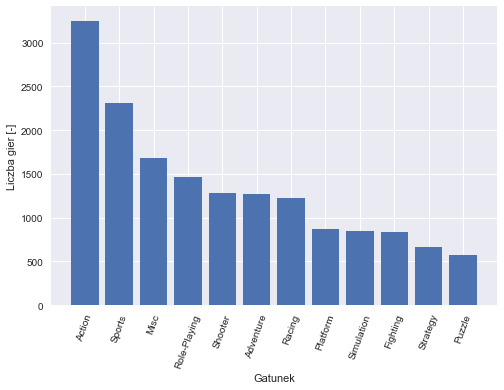

In [45]:
#wizualizacja zmiennej 'Genre'
gen = dane.Genre.value_counts() #pod zmienną 'gen' zapisuję liczbę wystąpień każdego gatunku, co oznacza liczbę gier w danym gatunku
gen_dict = dict(gen) #wyżej wyjaśniłem dlaczego zamieniam tą zmienną na słownik
plt.bar(gen_dict.keys(),gen_dict.values())
plt.xticks(rotation=70) #obracam etykiety na osi x z tego samego powodu co przy zmiennej 'Publisher'
plt.xlabel('Gatunek')
plt.ylabel('Liczba gier [-]')
plt.show()

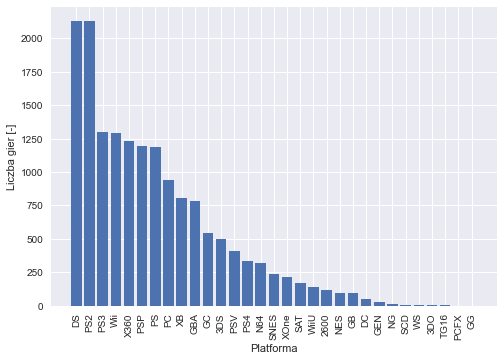

In [46]:
#wizualizacja zmiennej 'Platform'
#poniżej dzieje się tosamo co przy wizualizacji poprzednich zmiennych
plat = dane.Platform.value_counts() #w zmiennej 'plat' zapisałem liczbę wystąpień każdej platformy, co oznacza liczbę gier wydanych na daną platformę
plat = dict(plat)
plt.bar(plat.keys(),plat.values())
plt.xlabel('Platforma')
plt.ylabel('Liczba gier [-]')
plt.xticks(rotation=90)
plt.show()

To koniec wizualizacji poszzczególnych zmiennych w mojej części i przystępuję do analizy korelacji i testowania różnic

In [47]:
#zaczynam od sprawdzenia czy ilość sprzedawanych gier akcji istotnie różni się od ilości sprzedawanych gier platformowych na przestrzeni lat i w skali globalnej
lata_act = dane[dane.Genre=='Action'].groupby('Year').sum() #pod zmienną 'lata_act' tworzę podzbiór zawierający gry akji - dane[dane.Genre=='Action']
                                                            #i obliczam od razu sumę sprzedaży tych gier dla każdego roku - .sum()
lata_plat = dane[dane.Genre=='Platform'].groupby('Year').sum() #pod zmienną 'lata_plat' tworzę podzbiór zawierający gry platformowe - dane[dane.Genre=='Platform']
                                                                #i obliczam od razu sumę sprzedaży tych gier dla każdego roku - .sum()
lata_act #wyświetlam lata_act, żeby przejrzeć jak wygląda podzbiór 

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
1980,0.32,0.02,0.00,0.00,0.34
1981,13.51,0.81,0.00,0.12,14.84
1982,6.07,0.38,0.00,0.05,6.52
1983,2.67,0.17,0.00,0.02,2.86
1984,0.80,0.19,0.83,0.03,1.85
1985,1.64,0.38,1.44,0.06,3.52
1986,6.52,1.66,5.31,0.25,13.74
1987,1.04,0.06,0.00,0.01,1.12
1988,1.15,0.16,0.42,0.01,1.75


TypeError: float() argument must be a string or a number, not 'dict_keys'

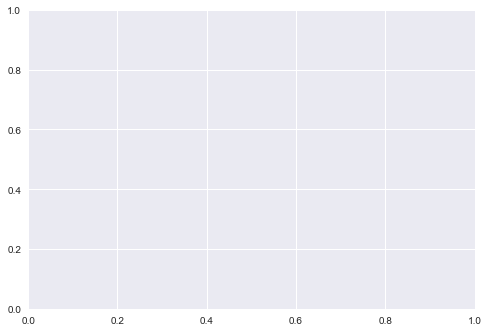

In [48]:
act_dict = dict(lata_act.loc[:,'Global_Sales']) #w zmiennej act_dict tworzę słownik dla gier akcji tak samo jak w przypadku wizualizacji pojedynczych zmiennych i wydzielam kolumnę 'Global_Sales' do porównania                                                     #sprzedarży globalnej
plat_dict = dict(lata_plat.loc[:,'Global_Sales']) #w zmiennej plat_dict tworzę słownik dla gier akcji tak samo jak w przypadku wizualizacji pojedynczych zmiennych i wydzielam kolumnę 'Global_Sales' do porównania
#sprzedaży globalnej
#tworzę wykresy liniowe dla każdego słownika, żeby pokazać przy okazji zmienność sprzedaży gier akcji i platformowych na przestrzeni lat
plt.plot(act_dict.keys(),act_dict.values(),label='Action') 
plt.plot(plat_dict.keys(),plat_dict.values(),label='Platform',color='orange')
plt.xlabel('Rok [-]')
plt.ylabel('Liczba sprzedanych egzemplarzy [mln]')
plt.legend()
plt.show()

In [ ]:
t,p = st.ttest_ind(lata_act['Global_Sales'],lata_plat['Global_Sales']) #przeprowadzam test t, żeby zbadać istotność różnicy między sprzedażą gier akcji a platformowymi i zapisuję wynik testu do zmiennej 't'
#a istotność do zmiennej 'p'
print('t =',round(t,5),'\np =',round(p,5)) #wypisuję testu zaokrąglone do 5 miejsca po przecinku
print('srednia akcji:',lata_act['Global_Sales'].mean(),'\nsrednia platformowych:',lata_plat['Global_Sales'].mean()) #wypisuję średnie sprzedaży globalnej gier akcji i platformowych do napisania wniosku z testu t

Została mi jeszcze analiza korelacji między liczbą dodatków do podstawowej gry a sprzedażą tej gry na przykładzie serii The Sims wydanej na platformę PC

In [ ]:
#tworzę podzbiór gier zawierający podstawowe wersje gier z serii The Sims wydanych na PC, tak żeby była spójność platformy, ponieważ kolejne części mogły wychodzić na coraz więcej platform i zaburzyłoby to wynik
sims = dane[np.logical_and(dane.Name.isin(['The Sims','The Sims 2','The Sims 3','The Sims 4']),dane.Platform=='PC')].groupby('Name').sum()
sims

In [ ]:
#wizualizuję sprzedaż poszczególnych części serii The Sims
sims_sprzedaz=dict(sims.loc[:,'Global_Sales']) #wybieram sprzedaż globalną do badania korelacji, ponieważ jest najbardziej ogólna i zamieniam wybrane dane na słownik jak wcześniej
plt.bar(sims_sprzedaz.keys(),sims_sprzedaz.values()) #obrazuję rozkład sprzedaży poszczególnych części serii wykresem słupkowym
plt.xlabel('Gra serii \'The Sims\'')
plt.ylabel('Liczba sprzedanych egzemplarzy [mln]')

Poniżej sprawdzam ile każda część ma dodatków w zbiorze danych

In [49]:
dane[np.logical_and(dane.Name.str.contains('The Sims 4'), dane.Platform=='PC')]
#jak widać są 4 rekordy z The Sims 4 po odjęciu podstawowej wersji gry zostają 3 rekordy, a zatem w danych są 3 dodatki

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
478,The Sims 4,PC,2014,Simulation,Electronic Arts,0.96,1.72,0.0,0.29,2.97
7768,The Sims 4: Get Together,PC,2015,Simulation,Electronic Arts,0.05,0.13,0.0,0.01,0.19
13836,The Sims 4: Spa Day,PC,2015,Simulation,Electronic Arts,0.00,0.04,0.0,0.00,0.04
15897,The Sims 4: Luxury Party Stuff,PC,2015,Simulation,Electronic Arts,0.00,0.01,0.0,0.00,0.02


In [50]:
dane[np.logical_and(dane.Name.str.contains('The Sims 3'), dane.Platform=='PC')].count() #przejrzałem kolejne zbiory jak ten powyżej, żeby sprawdzić ile jest dodatków i używam tylko .count()
#jak widać jest 11 rekordów z The Sims 3, po odjęciu podstawowej wersji gry zostanie 10 rekordów, a zatem w danych jest 10 dodatków

Name            11
Platform        11
Year            11
Genre           11
Publisher       11
NA_Sales        11
EU_Sales        11
JP_Sales        11
Other_Sales     11
Global_Sales    11
dtype: int64

In [51]:
dane[np.logical_and(dane.Name.str.contains('The Sims 2'), dane.Platform=='PC')].count() 
#jak widać jest 12 rekordów z The Sims 2, po odjęciu podstawowej wersji gry zostanie 11 dodatków według danych

Name            12
Platform        12
Year            12
Genre           12
Publisher       12
NA_Sales        12
EU_Sales        12
JP_Sales        12
Other_Sales     12
Global_Sales    12
dtype: int64

In [52]:
dane[np.logical_and(dane.Name.str.contains('The Sims'), dane.Platform=='PC')].count() #sprawdzam wystąpienia frazy 'The Sims' w nazwach gier, żeby wyznaczyć liczbę dodatków pierwszej części

Name            39
Platform        39
Year            39
Genre           39
Publisher       39
NA_Sales        39
EU_Sales        39
JP_Sales        39
Other_Sales     39
Global_Sales    39
dtype: int64

In [53]:
#jak widać powyżej ogólnie z frazą 'The Sims' jest 39 rekordów, aby otrzymać liczbę dodatków dla pierwszej części The Sims odejmuje od 39 ilość wystąpień kolejnych części i wersję podstawową The Sims razem z
#wersjami deluxe i complete, które są w danych: 39-4-11-12-1-1-1=9, zatem w danych jest informacja o 9 dodatkach wydanych dla gry The Sims

Text(0, 0.5, 'Liczba dodatków [-]')

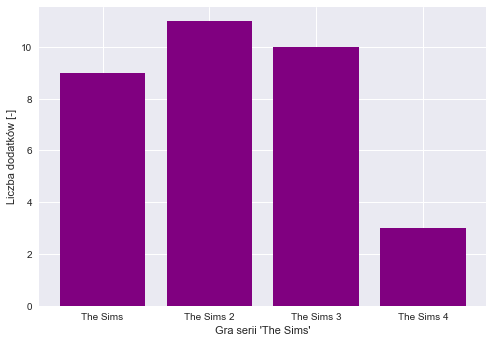

In [54]:
sims_dodatki = {'The Sims':9,'The Sims 2':11,'The Sims 3':10,'The Sims 4':3} #tworzę słownik z otrzymanymi liczbami dodatków dla każej części serii The Sims
#wizualizuję liczbę dodatków dla każdej części
plt.bar(sims_dodatki.keys(),sims_dodatki.values(),color='purple')
plt.xlabel('Gra serii \'The Sims\'')
plt.ylabel('Liczba dodatków [-]')

In [55]:
r,p = st.pearsonr(list(sims_sprzedaz.values()),list(sims_dodatki.values())) #obliczam współczynnik korelacji liniowwej Pearsona dla niezależnych danych ilościowych i zapisuję współczynnik pod zmienną 'r', a
#istotność pod zmienną 'p'
print('r =',round(r,5),'\np =',round(p,5)) #wypisuję wyniki zaokrąglone do 5 miejsca po przecinku

NameError: name 'sims_sprzedaz' is not defined

In [56]:
d = np.polyfit(list(sims_dodatki.values()),list(sims_sprzedaz.values()),1) #obliczam metodą najmniejszych kwadratów współrzędne punktów na linii regresji
f = np.poly1d(d) #tworzę funkcję na podstawie punktów wyznaczonych w zmiennej 'd'
plt.scatter(sims_dodatki.values(),sims_sprzedaz.values(),sizes=[50,50,50,50]) #robię wykres rozrzutu liczby sprzedanych podstawowych wersji gier względem liczby ich dodatków
plt.xlabel('Liczba dodatków [-]')
plt.ylabel('Liczba sprzedanych egzemplarzy gry [mln]')
plt.plot(sims_dodatki.values(),f(list(sims_dodatki.values())),label='Linia regresji',color='r') #dodaję do wykresu linię regresji, która obrazuje związek między zmiennymi - w tym przypadku związku nie ma,
#dlatego linia jest prawie pozioma
plt.legend()
plt.show()

NameError: name 'sims_sprzedaz' is not defined

To wszystko z mojej części :)

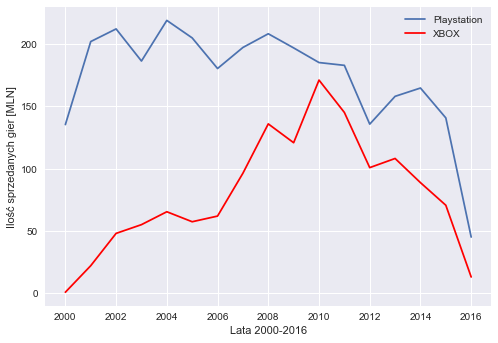

In [61]:
ps= dane[dane.Platform.str.contains('PS')].groupby('Year').sum()
xbox= dane[np.logical_and(dane.Platform.str.contains('X'), dane.Platform!='PCFX')].groupby('Year').sum()
ps_dict=dict(ps.loc[2000:2016,'Global_Sales'])
xbox_dict=dict(xbox.loc[2000:2016,'Global_Sales'])
plt.plot(list(ps_dict.keys()),list(ps_dict.values()),label='Playstation')
plt.plot(list(xbox_dict.keys()),list(xbox_dict.values()),color='red',label='XBOX')
plt.xlabel('Lata 2000-2016')
plt.ylabel('Ilość sprzedanych gier [MLN]')
plt.legend()
plt.show()